In [20]:
# loading libraries for machine learning - predection analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
# loading the file
hotel_df = pd.read_csv("/Users/georgekalfas/Downloads/ML-HotelReservations/EDA-ML/Hotel Reservations.csv")

# Prediction Models

In [22]:
# Load your dataset (assuming it's in a DataFrame called 'hotel_df')
# Replace 'target_column' with the actual column name you want to predict
target_column = 'booking_status'

# Select features and target variable
features = hotel_df.drop(target_column, axis=1)  # Assuming 'booking_status' is the target
target = hotel_df[target_column]

# Handle categorical columns if any
label_encoder = LabelEncoder()
for column in features.columns:
    if features[column].dtype == 'object':
        features[column] = label_encoder.fit_transform(features[column])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.76      0.62      0.68      2416
Not_Canceled       0.83      0.90      0.86      4839

    accuracy                           0.81      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.80      0.81      0.80      7255


Confusion Matrix:
[[1497  919]
 [ 483 4356]]


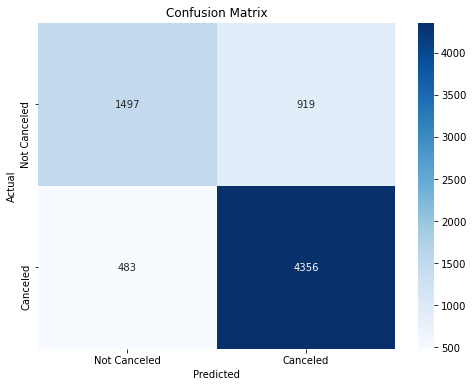

In [23]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Canceled', 'Canceled'], 
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# hotel_df_copy = hotel_df.copy()

# # Feature Engineering
# # For instance, creating a new feature 'total_nights_stayed' by combining 'no_of_weekend_nights' and 'no_of_week_nights'
# hotel_df_copy['total_nights_stayed'] = hotel_df_copy['no_of_weekend_nights'] + hotel_df_copy['no_of_week_nights']

# # EDA - Exploratory Data Analysis
# # Checking data distribution and relationships
# sns.pairplot(hotel_df_copy[['total_nights_stayed', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']])
# plt.show()

# # Normalization/Standardization of numerical columns
# scaler = StandardScaler()
# numerical_cols = ['total_nights_stayed', 'avg_price_per_room', 'no_of_special_requests']
# hotel_df_copy[numerical_cols] = scaler.fit_transform(hotel_df_copy[numerical_cols])

# # Dimensionality Reduction using PCA
# pca = PCA(n_components=2)
# pca_data = pca.fit_transform(hotel_df_copy[numerical_cols])

# # Creating a DataFrame from PCA output
# pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])

# # Adding the target variable to the PCA DataFrame
# pca_df['Booking_Status'] = hotel_df_copy['booking_status']

# # Visualizing PCA components with respect to booking status
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='PCA1', y='PCA2', hue='Booking_Status', data=pca_df, palette='Set1')
# plt.title('PCA Components by Booking Status')
# plt.show()

In [27]:
# from sklearn.cluster import KMeans

# # Assuming 'hotel_df' is the DataFrame after preprocessing

# # Selecting relevant features for clustering
# clustering_cols = ['total_nights_stayed', 'avg_price_per_room', 'no_of_special_requests']

# # Applying K-means clustering
# num_clusters = 4  # Number of clusters
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# hotel_df_copy['Cluster_Labels'] = kmeans.fit_predict(hotel_df_copy[clustering_cols])

# # Evaluate clustering results
# # Assess silhouette score, Davies-Bouldin index, etc.
# from sklearn.metrics import silhouette_score, davies_bouldin_score
# silhouette = silhouette_score(hotel_df_copy[clustering_cols], hotel_df_copy['Cluster_Labels'])
# davies_bouldin = davies_bouldin_score(hotel_df_copy[clustering_cols], hotel_df_copy['Cluster_Labels'])

# print(f"Silhouette Score: {silhouette}")
# print(f"Davies-Bouldin Index: {davies_bouldin}")
